## Bayes Naive Spam Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =  pd.read_table('https://raw.githubusercontent.com/sinanuozdemir/sfdat22/master/data/sms.tsv',
                   sep='\t', header=None, names=['label', 'msg'])
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


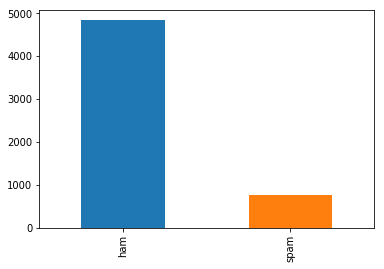

In [3]:
plt.figure()
df['label'].value_counts().plot(kind='bar')
plt.show()

Compute the probability of the null model (all entry is ham)

In [4]:
# The null model would have 87% accuracy
df['label'].value_counts()/df.shape[0]

ham     0.865937
spam    0.134063
Name: label, dtype: float64

**Bayes Theorem**

$$P(class\,C|\{x_i\}) = \frac{P(\{x_i\}|class\,C) \cdot P(class\,C)}{P(\{x_i\})}$$
where *xi* are the features

Let's suppose we want to classify an email containing 3 words "send", "cash" and "now" as spam or not-spam (ham). We need to compute the following probabilities:  

$$P(spam|send\,cash\,now) = \frac{P(send\,cash\,now|spam) \cdot P(spam)}{P(send\,cash\,now)}$$  

$$P(ham|send\,cash\,now) = \frac{P(send\,cash\,now|ham) \cdot P(ham)}{P(send\,cash\,now)}$$

Since they have the same denominator we are more interested in following:  

$$P(send\,cash\,now|spam) \cdot P(spam)\quad VS \quad P(send\,cash\,now|ham) \cdot P(ham)$$  

Let's compute the probabilities:  

$$ P(spam) = 0.134063 $$  
$$ P(ham) = 0.865937 $$

In [5]:
df['msg'] = df['msg'].apply(lambda x:x.lower())

In [6]:
# Any row contains the sentence 'send cash now'
df[df['msg'].str.contains('send cash now')].shape

(0, 2)

Naive Bayes makes the assumption that each caractheristic (word) is conditionally independent. So we can write:

$$P(send\,cash\,now|spam) = P(send|spam) \cdot P(cash|spam) \cdot P(now|spam)$$  

In [7]:
spams = df[df['label']=='spam']
for word in ['send', 'cash', 'now']:
    print(word, spams[spams['msg'].str.contains(word)].shape[0]/spams.shape[0])

send 0.0963855421686747
cash 0.09103078982597054
now 0.2797858099062918


$$P(send\,cash\,now|spam) \cdot P(spam) = (0.096 \cdot 0.091 \cdot 0.280)\cdot0.134 = 0.00032$$

In [8]:
spams = df[df['label']=='ham']
for word in ['send', 'cash', 'now']:
    print(word, spams[spams['msg'].str.contains(word)].shape[0]/spams.shape[0])

send 0.02922279792746114
cash 0.002694300518134715
now 0.10880829015544041


$$P(send\,cash\,now|ham) \cdot P(ham) = (0.03 \cdot 0.003 \cdot 0.109)\cdot0.865 = 0.0000084$$


From the result it follows that:
$$P(send\,cash\,now|spam)\cdot P(spam) > P(sendcashnow|ham)\cdot P(ham)$$

In [9]:
0.00032/0.0000084

38.0952380952381

Probability of spam is 28 times higher than probability of ham